# 유방암 판별 예측

## 패키지 로딩

In [2]:
from sklearn.datasets import load_breast_cancer
# 유방암 환자에 관한 데이터 패키지 함수를 불러옴
from sklearn.linear_model import LogisticRegression
# Logistic Regression 모델을 사용해서 분류분석을 진행할 예정
from sklearn.preprocessing import StandardScaler
# Scaling을 위한 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix, f1_score ,plot_roc_curve
# 정확도를 측정하기 위한 패키지
from sklearn.model_selection import train_test_split
# 데이터를 분리하기 위한 패키지

import numpy as np
import pandas as pd

## 데이터 로드 및 확인

In [3]:
breast = load_breast_cancer()
print(breast.DESCR)
#DESCR(describe로 외우면 됨)은 데이터 셋 정보를 확인할 수 있음
#:Class Distribution: 212 - Malignant(악성종양), 357 - Benign(양성종양)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [16]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [3]:
# 독립변수를 데이터 프레임에 담음
df = pd.DataFrame(breast.data, columns = breast.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# 종속변수도 맨 뒤에 담아보기
df['class'] = breast.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
#종속변수가 어떤 분류를 갖고있는지 보기
df['class'].value_counts()
#0이 악성종양(positive), 1이 양성 종양(negative)

1    357
0    212
Name: class, dtype: int64

In [6]:
#독립변수와 종속변수 생성
x = breast.data
y = breast.target
x.shape , y.shape

((569, 30), (569,))

## 데이터 스케일링 (표준화/ 정규화)

In [7]:
df.describe()
# 컬럼간의 평균과 표준편차 단위가 큰 편이기 때문에 스케일링이 필요하다. (어깨높이 맞추기)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
scaled_x = StandardScaler().fit_transform(x) # 표준화 (평균 0 , 표편 1)

## 학습 데이터와 평가 데이터 분리

In [9]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, stratify=y)
#stratify 파라미터 --> 평가 데이터와 학습데이터를 분류 비율에 맞게 학습과 평가 데이터를 분리함

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

## 모델 생성
- 회기 계수 최적화 옵션
    - solver : 최적화 문제에 사용될 알고리즘
        - 'lbfgs': solver의 기본값 , CPU코어에 수가 많다면 병렬로 수행할 수 있다. 
        - 'liblinear' : 작은 데이터에 적합한 알고리즘. '비용함수/ 경사 하강법'에서 국소 최적화(local minimum) 문제가 있고(global minimum을 못찾을 우려가 있다), 병렬 최적화(동시에 multi core를 활용해서 수행하는 것, 즉 멀티 테스킹)를 수행할 수 없다.
        - 'sag', 'saga' : 확률적 경사 하강법을 기반으로 한 알고리즘으로 대용량 데이터에 적합
            - 확률적 경사 하강법 : 일반적 경사 하강법 보다 처리 속도가 빠름( 랜덤추출)
        - 'newton-cg': 멀티클래스 분류 모델에 사용
    - solver에 따른 규제 지원 사항
        - newton-cg, lbfgs, sag : L2규제
        - liblinear, saga : L1과 L2규제 모두를 사용할 수 있다
        - C: 규제 강도의 역수 (선형 모델에서는 alpha, Logistic Regression과 같이 분류모델에는 C를 사용한다) , alpha의 값이 클수록, C는 값이 작을수록 모델이 단순해진다= 학습에서 제외되거나가중치가 작아지는 정도가 커짐.)
        
    - max_iter: solver가 수렴하는데 필요한 반복 횟수 (default = 100)

In [10]:
# 로지스틱 회기 분석
model = LogisticRegression()
model.fit(x_train,y_train)
print('추정계수(가중치):', model.coef_)
print('y절편', model.intercept_)

추정계수(가중치): [[-0.3487556  -0.6131979  -0.3379332  -0.43100447 -0.13045038  0.56148929
  -0.79195712 -0.93740033  0.12690698  0.29083574 -1.19245278  0.02273425
  -0.74755932 -0.83793986  0.20290098  0.73892415 -0.04704757 -0.47702106
   0.10998236  0.4981363  -0.75463541 -0.87616546 -0.60921991 -0.74089415
  -1.06516296  0.09986112 -0.96366488 -0.90047384 -0.77341461 -0.30688863]]
y절편 [0.47313081]


## 모델 예측

In [11]:
y_hat = model.predict(x_test)
print('예측값:', y_hat[:20])
print('실제값:', y_test[:20])

예측값: [1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1]
실제값: [1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1]


## Confusion Matrix 
- 혼동 행렬 함수는 행을 true(실제상황), 열을 predict(예측)값으로 이용하며, 양성과 음성의 구분은 별도의 레이블을 지정하지 않으면 레이블 값(y값)의 정렬된 순서로 사용한다.
    -현재는 0과 1이기 때문에, 0이 positive이고 1이 negative로 사용되어 질것
<pre>
           Predict
       -----------------
            N | P 
       -----------------
     |N|   TN | FP
     |P|   FN | TP
      -----------------
       
</pre>

0이 악성종양, 1이 양성종양(암이 아닌 종양)

In [12]:
matrix = confusion_matrix(y_test, y_hat)
matrix

array([[ 59,   5],
       [  1, 106]], dtype=int64)

## 평가지표

In [25]:
np.set_printoptions(suppress=True, precision= 2)

In [14]:
accuracy = accuracy_score(y_test,y_hat) #  64+106/전체
precision = precision_score(y_test, y_hat) #106 /  0+106

recall = recall_score (y_test, y_hat) #106/106+1
#roc_auc_score의 두번째 매개변수 값은 positive로 예측한 확률값을 전달한다.
predict_proba_positive = model.predict_proba(x_test)[:,1] 
#model.predict_proba : 예측 확률값  -->  (negative일 확률, positive일 확률)
auc = roc_auc_score(y_test,predict_proba_positive )

print(f'정확도 :{accuracy:.3f}\n정밀도:{precision:.3f}\n재현율:{recall:.3f}\nAUC:{auc:.3f} ')

정확도 :0.965
정밀도:0.955
재현율:0.991
AUC:0.994 


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


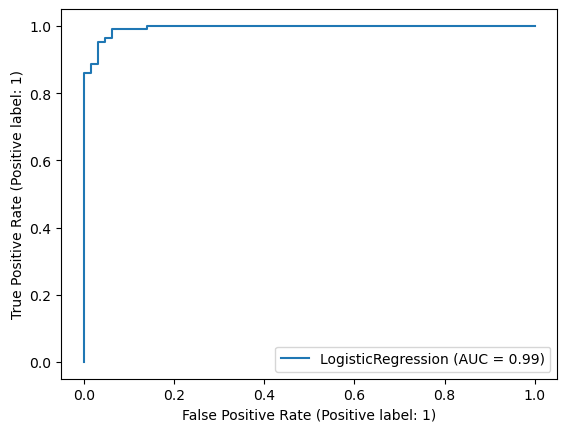

In [15]:
import matplotlib.pyplot as plt

plot_roc_curve(model, x_test, y_test)
plt.show()

In [24]:
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']

for solver in solvers:
    model = LogisticRegression(solver = solver, max_iter = 600)
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    
    print(f'solver:{solvers}, auccuracy:{accuracy_score(y_test,y_hat):.3f},auc:{roc_auc_score(y_test,predict_proba_positive):.3f}')

solver:['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'], auccuracy:0.965,auc:0.994
solver:['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'], auccuracy:0.971,auc:0.994
solver:['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'], auccuracy:0.965,auc:0.994
solver:['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'], auccuracy:0.965,auc:0.994
solver:['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'], auccuracy:0.965,auc:0.994


## 예측 확률
- 각 레코드 (사례)별로 개별 클래스 예측 확률값 반환
- 분류 임계값 0.5

In [1]:
import numpy as np

In [ ]:
np.printoptions

In [30]:
y_test[:10]
y_hat[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [27]:
prob = model.predict_proba(x_test)
prob_df = pd.DataFrame(prob[:10], columns = ['negative(0)', 'positive(1)'])
prob_df

,negative(0),positive(1)
0,0.001187,9.988126e-01
1,0.999982,1.833581e-05
2,0.999991,8.712271e-06
3,0.323565,6.764354e-01
4,1.000000,3.060869e-10
5,0.999979,2.092789e-05
6,0.000162,9.998379e-01
7,0.141382,8.586179e-01
8,0.152693,8.473071e-01
9,0.999996,4.395918e-06


# 개인 신용도 예측

In [67]:
PersonalLoan = pd.read_csv('./Personal_Loan.csv')

In [88]:
PersonalLoan.shape

(5000, 14)

In [89]:
PersonalLoan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [90]:
PersonalLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [91]:
np.sum(PersonalLoan.isna())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [92]:
PersonalLoan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## 데이터 전처리
- 불필요한 컬럼 삭제 = ID, ZipCode

In [93]:
PersonalLoan = PersonalLoan.drop(['ID','ZIP Code'], axis =1)

In [94]:
PersonalLoan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## X값과 Y값 분리

In [95]:
x = PersonalLoan.drop('Personal Loan', axis = 1)
y = PersonalLoan['Personal Loan']

In [96]:
y.value_counts() # 0 이 negative, 1이 positive

0    4520
1     480
Name: Personal Loan, dtype: int64

In [97]:
PersonalLoan.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 데이터 스케일링 

In [98]:
scaled_x = StandardScaler().fit_transform(x)

## 학습데이터와 평가데이터 분리

In [99]:
y.unique() # 이항 (0 불가 1 승인)

array([0, 1], dtype=int64)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y,test_size=0.3, stratify= y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

## 모델 생성 및 학습
**로지스틱 회귀계수의 해석**
- 로지스틱 회기계수는 지수변환(exp()을 취한다)을 해주면 odds비가 나온다
- odds 비  = 성공할 확률 / 실패할 확률
- 대출 성공 확률 / 대출 실패 확률
- 대출 여부에 영향을 미치는 A변수 (예를들어 '교육수준')의 오즈비가 1보다 큰 경우 대출 승인 확률이 높다는 의미(만약 오즈비가 5라면 대출 거부 확률보다 대출 승인확률이 5배 높다는 의미이다)

In [101]:
model = LogisticRegression(max_iter=2000)
#max_iter = 반복 학습의 횟수
model.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [102]:
coef = model.coef_.flatten()
odds_rate = np.exp(model.coef_).flatten()

In [103]:
coef_df = pd.DataFrame({'가중치':coef, 'Odds 비': odds_rate}, index = x.columns)
coef_df

,가중치,Odds 비
Age,-0.299886,0.740903
Experience,0.463416,1.589494
Income,2.498239,12.161064
Family,0.728562,2.072098
CCAvg,0.170586,1.185999
Education,1.462127,4.315130
Mortgage,0.105253,1.110992
Securities Account,-0.351214,0.703833
CD Account,0.894918,2.447135
Online,-0.309759,0.733624


In [113]:
print(x.columns)
print('추정계수(가중치):', model.coef_.squeeze(axis = 0))
print('y절편', model.intercept_)

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')
추정계수(가중치): [-0.3   0.46  2.5   0.73  0.17  1.46  0.11 -0.35  0.89 -0.31 -0.53]
y절편 [-4.6]


## 모델 예측

In [114]:
y_hat = model.predict(x_test)

In [118]:
# 비교
print ('실제 값', y_test[:20].values)
print('예측 값', y_hat[:20])

실제 값 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
예측 값 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 모델 성능 측정
- Confusion Matrix

In [121]:
matrix = confusion_matrix(y_test, y_hat)
confusion_matrix_df = pd.DataFrame(matrix, columns =[['predict','predict'],['대출불허(neg,0)','대출 승인 (pos,1)']], index = [['actual','actual'], ['대출불허(neg,0)','대출승인(pos,1)']] )

display(confusion_matrix_df)

predict              
                   대출불허(neg,0) 대출 승인 (pos,1)
actual 대출불허(neg,0)        1328            28
       대출승인(pos,1)          53            91

## 평가지표

In [123]:
accuracy = accuracy_score(y_test,y_hat)
recall = recall_score(y_test,y_hat)
precision = precision_score(y_test,y_hat)
f1 = f1_score(y_test, y_hat)
predict_positive = model.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, predict_positive)
print(f'정확도:{accuracy:.3f}')
print(f'재현율:{recall:.3f}')
print(f'정밀도:{precision:.3f}')
print(f'F1:{f1:.3f}')
print(f'AUC:{auc:.3f}')

정확도:0.946
재현율:0.632
정밀도:0.765
F1:0.692
AUC:0.960


In [125]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1]) 
# FPR = x값, TPR = y값, thresholds(임계값)
import matplotlib.pyplot as plt

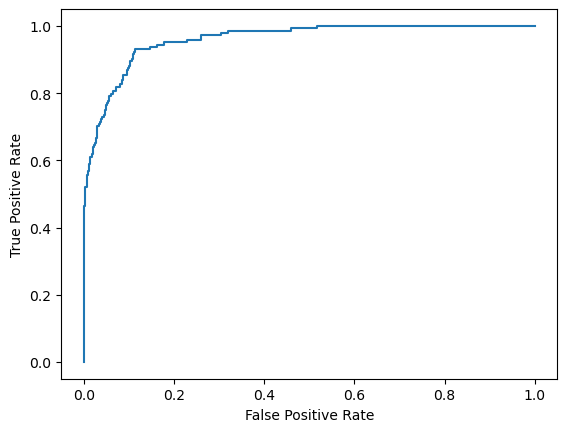

In [126]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


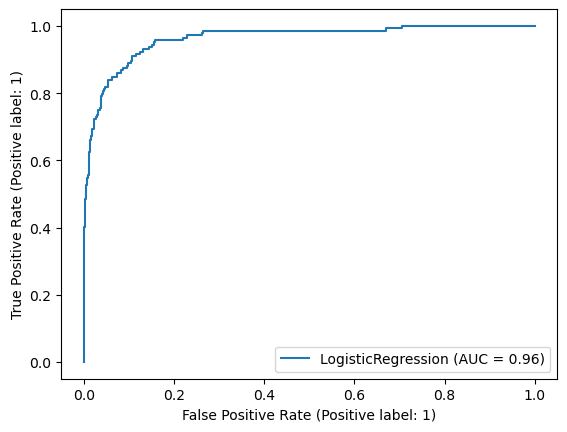

In [65]:
import matplotlib.pyplot as plt

plot_roc_curve(model, x_test, y_test)
plt.show()

## 교차검증 

In [140]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [129]:
from sklearn.model_selection import cross_validate

In [143]:
result = cross_validate(model, x, y, cv = 10,scoring= ['accuracy','precision','roc_auc','recall', 'f1'])
for key, value in result.items():
    print('평가지표:',key)
    for num,val in enumerate(value, start = 1):
        print(f'{num}번째 교차검증 값: {val:.2f}')
    print(f'평균값:{np.mean(value):.2f}')
    print('-'*30)

pd.DataFrame({ key : value for key, value in result.items() })

평가지표: fit_time
1번째 교차검증 값 0.45
2번째 교차검증 값 0.32
3번째 교차검증 값 0.42
4번째 교차검증 값 0.57
5번째 교차검증 값 0.38
6번째 교차검증 값 0.40
7번째 교차검증 값 0.48
8번째 교차검증 값 0.40
9번째 교차검증 값 0.37
10번째 교차검증 값 0.43
평균값:0.42
------------------------------
평가지표: score_time
1번째 교차검증 값 0.02
2번째 교차검증 값 0.00
3번째 교차검증 값 0.00
4번째 교차검증 값 0.00
5번째 교차검증 값 0.02
6번째 교차검증 값 0.00
7번째 교차검증 값 0.02
8번째 교차검증 값 0.00
9번째 교차검증 값 0.02
10번째 교차검증 값 0.00
평균값:0.01
------------------------------
평가지표: test_accuracy
1번째 교차검증 값 0.96
2번째 교차검증 값 0.95
3번째 교차검증 값 0.95
4번째 교차검증 값 0.94
5번째 교차검증 값 0.96
6번째 교차검증 값 0.95
7번째 교차검증 값 0.96
8번째 교차검증 값 0.94
9번째 교차검증 값 0.97
10번째 교차검증 값 0.94
평균값:0.95
------------------------------
평가지표: test_precision
1번째 교차검증 값 0.82
2번째 교차검증 값 0.79
3번째 교차검증 값 0.81
4번째 교차검증 값 0.74
5번째 교차검증 값 0.84
6번째 교차검증 값 0.85
7번째 교차검증 값 0.85
8번째 교차검증 값 0.74
9번째 교차검증 값 0.90
10번째 교차검증 값 0.76
평균값:0.81
------------------------------
평가지표: test_roc_auc
1번째 교차검증 값 0.96
2번째 교차검증 값 0.96
3번째 교차검증 값 0.93
4번째 교차검증 값 0.94
5번째 교차검증 값 0.96
6번째 교차검증 값 0.96
7번째 교차검증

In [144]:
result.get()

{'fit_time': array([0.45, 0.32, 0.42, 0.57, 0.38, 0.4 , 0.48, 0.4 , 0.37, 0.43]),
 'score_time': array([0.02, 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.02, 0.  ]),
 'test_accuracy': array([0.96, 0.95, 0.95, 0.94, 0.96, 0.95, 0.96, 0.94, 0.97, 0.94]),
 'test_precision': array([0.82, 0.79, 0.81, 0.74, 0.84, 0.85, 0.85, 0.74, 0.9 , 0.76]),
 'test_roc_auc': array([0.96, 0.96, 0.93, 0.94, 0.96, 0.96, 0.97, 0.96, 0.98, 0.95]),
 'test_recall': array([0.69, 0.62, 0.6 , 0.52, 0.67, 0.6 , 0.71, 0.52, 0.73, 0.54]),
 'test_f1': array([0.75, 0.7 , 0.69, 0.61, 0.74, 0.71, 0.77, 0.61, 0.8 , 0.63])}

In [151]:
result_df = pd.DataFrame({ key : value for key, value in result.items() }, columns = result.keys() ,index = np.arange(1,11) )

In [152]:
result_df

,fit_time,score_time,test_accuracy,test_precision,test_roc_auc,test_recall,test_f1
1,0.446944,0.016483,0.956,0.825000,0.958702,0.687500,0.750000
2,0.316577,0.000000,0.948,0.789474,0.956397,0.625000,0.697674
3,0.417592,0.000000,0.948,0.805556,0.933674,0.604167,0.690476
4,0.567147,0.000000,0.936,0.735294,0.943077,0.520833,0.609756
5,0.381095,0.015626,0.956,0.842105,0.963542,0.666667,0.744186
6,0.401978,0.000000,0.952,0.852941,0.959947,0.604167,0.707317
7,0.483746,0.015083,0.960,0.850000,0.971331,0.708333,0.772727
8,0.401139,0.000000,0.936,0.735294,0.963772,0.520833,0.609756
9,0.366771,0.015539,0.966,0.897436,0.980273,0.729167,0.804598
10,0.433897,0.000000,0.940,0.764706,0.950867,0.541667,0.634146


In [153]:
result_df.mean()

fit_time          0.421689
score_time        0.006273
test_accuracy     0.949800
test_precision    0.809781
test_roc_auc      0.958158
test_recall       0.620833
test_f1           0.702064
dtype: float64

## 교차검증 결과 모델 저장

In [148]:
import joblib # 모델 학습 결과를 pickle 파일로 저장하기 위한 라이브러리
joblib.dump(model, './lr_model.pkl') #피클 확장자

['./lr_model.pkl']

In [149]:
loaded_model = joblib.load('./lr_model.pkl')
y_hat = loaded_model.predict(x_test)
print(y_hat[:10])

[0 0 0 0 0 0 0 0 0 0]
